In [ ]:
# Základní statistické ukazatele

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

In [2]:
!pip install scipy

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
labels = {0: "no", 1: "yes"}
data["Outcome"] = data["Outcome"].map(labels)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


In [5]:
print(data["BloodPressure"].mean())
print(data["BloodPressure"].median())
print(data["BloodPressure"].mode())

69.10546875
72.0
0    70
Name: BloodPressure, dtype: int64


<AxesSubplot: >

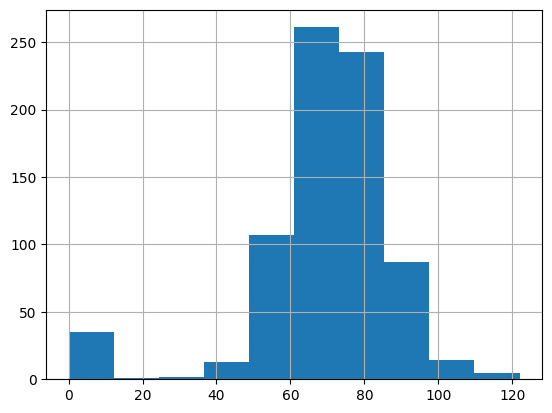

In [6]:
data["BloodPressure"].hist() #míra četnosti

In [7]:
clear_data = data[data["BloodPressure"] > 0]

In [8]:
clear_data["BloodPressure"].mean()

72.40518417462484

In [9]:
clear_data["BloodPressure"].median()

72.0

In [10]:
clear_data["BloodPressure"].mode()

0    70
Name: BloodPressure, dtype: int64

In [11]:
radky4 = data.head(4)
radky4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no


In [12]:
# Hypotézy
# tvrzení, ověřujeme, zda je hypotéza platná
# populace - všichni
# výběr - část z populace 

# náhodný výběr 

In [13]:
data["Outcome"].value_counts()
# 500 jich cukrovku nemá 
# 268 jich cukrovku má

no     500
yes    268
Name: Outcome, dtype: int64

In [14]:
data = data[data["BloodPressure"] > 0]

In [15]:
data_yes = data[data["Outcome"] == "yes"]
data_no = data[data["Outcome"] == "no"]

In [16]:
data_yes["BloodPressure"].mean()

75.32142857142857

In [17]:
data_no["BloodPressure"].mean()

70.87733887733887

In [18]:
# hypotéza, že ženy, co mají cukrovku, mají vyšší krevní tlak

In [19]:
# Data si můžeme porovnat i graficky. Šedá linka, kterou zobrazuje barplot(), je tzv. interval spolehlivosti, tj. interval, kde se dle odhadu nachází 95 % hodnot.

<AxesSubplot: xlabel='Outcome', ylabel='BloodPressure'>

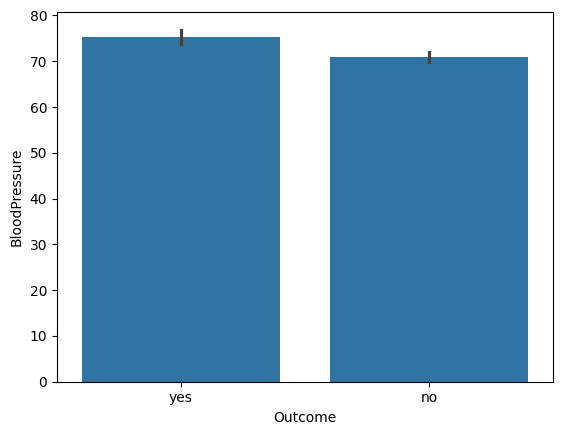

In [20]:
sns.barplot(data, x="Outcome", y="BloodPressure")

In [21]:
data['BloodPressure'].var() # rozptyl anglicky variance 

153.31784194007707

In [22]:
data['BloodPressure'].std() # jak moc se liší jsou v průměru vzdálené od středu
# nebo lze říct, jak moc jsou data přesná

12.38215821010526

In [23]:
data_yes['BloodPressure'].mean()

75.32142857142857

In [24]:
data_no[data_no['BloodPressure'] > data_yes['BloodPressure'].mean()]
#zeny co nemaji cukrovku a maji vetsi krevni tlak nez prumer

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,4,110,92,0,0,37.6,0.191,30,no
12,10,139,80,0,0,27.1,1.441,57,no
20,3,126,88,41,235,39.3,0.704,27,no
21,8,99,84,0,0,35.4,0.388,50,no
28,13,145,82,19,110,22.2,0.245,57,no
...,...,...,...,...,...,...,...,...,...
745,12,100,84,33,105,30.0,0.488,46,no
751,1,121,78,39,74,39.0,0.261,28,no
756,7,137,90,41,0,32.0,0.391,39,no
758,1,106,76,0,0,37.5,0.197,26,no


In [28]:
# Formulace statistických hypotéz

######### Při testování hypotéz vždy nejprve definujeme dvě hypotézy - nulovou (null hypothesis) a alternativní (alternative hypohesis). Tyto dvě hypotézy musí být vždy ve sporu, tj. nemůže nastat situace, že by byly obě pravdivé. Nulová hypotéza v sobě má často znaménko rovná se, alternativní pak mívá znaménko nerovná se, větší než nebo menší než. Dále můžeme v nulové hypotéze tvrdit, že mezi dvěma sloupci v tabulce není závislost, a alternativní hypotéza bude říkat, že závislost existuje (to si ukážeme v dalších lekcích).

Uvažujme následující dvojici hypotéz:

Nulová hypotéza:
Ženy trpící cukrovkou mají v průměru (ve střední hodnota) stejný krevní tlak jako ženy, které cukrovkou netrpí
Alternativní hypotéza: 
Ženy trpící cukrovkou mají v průměru (ve střední hodnota) jiný krevní tlak jako ženy, které cukrovkou netrpí

Při formulování statistických hypotéz (a ve statistice obecně) obvykle rozlišujeme mezi dvěma pojmy:

Průměr = to, co jsme spočítali z našich dat.
Střední hodnota = hodnota, která se vztahuje k celé populaci (například ke všem ženám na světě). Střední hodnotu neznáme, ale odhadujeme ji pomocí průměru.
Je zřejmé, že obě hypotézy nemohou být pravidivé. Při testování hypotéz můžeme dojít k následujícím závěrům:

zamítáme (reject) H0 (a tedy tvrdíme, že platí H1),
nezamítáme (do not reject) H0 (a tedy jsme neprokázali, že platí H1).

Při testování se můžeme dopustit 2 chyb, které jsou popsány v tabulce níže.

Krevní tlak se neliší	Krevní tlak se liší
Neprokázali jsme rozdíl	Správný výsledek	Chyba II. druhu (Type II Error)
Tvrdíme, že jsme našli rozdíl	Chyba I. druhu (Type I Error)	Správný výsledek
Rozepišme si nyní tyto chyby obecně

Nulová hypotéze platí	Nulová hypotéza neplatí
Nezamítáme nulovou hypotézu	Správný výsledek	Chyba II. druhu
Zamítáme nulovou hypotézu	Chyba I. druhu	Správný výsledek


In [29]:
# výběr vhodného testu
# krevní tlak ženy s cukrovkou a ženy bez cukrovky se neliší

#u t-testu je vždy nulová hodnota, že se hodnoty rovnají 
# t-test - porovnáváme dva průměry, 2 skupiny musí mít podobný počet pozorování, je tam předpoklad o rozdělení (předpokládám ho), a ty vzorky jsou nezávislé

#t-test řekne, jak jsou daleko průměry
#a jaká je pravděpodobnost, že ta čísla nejsou z nějaké populace 


In [30]:
stats.ttest_ind(data_yes["BloodPressure"], data_no["BloodPressure"])

TtestResult(statistic=4.680835112808535, pvalue=3.405150901552251e-06, df=731.0)

In [ ]:
#Pokud je p-hodnota < 0.05, zamítáme nulovou hypotézu (tj. platí alternativní hypotéza).
#Pokud je p-hodnota > 0.05, nezamítáme nulovou hypotézu.
#V našem případě je p-hodnota 0.07151390009776082. Číslo je vyšší než 0.05. I když jsme tedy zjistili různou hodnotu průměrného tlaku u našich dvou skupin, rozdíl není "statisticky významný". To znamená, že pravděpodobnost, že by takový rozdíl (na výběru dané velikosti) mohl být náhoda, je příliš velká.



In [109]:
stats.ttest_ind(data_yes["BMI"], data_no["BMI"])
#Nulová hypotéza - hodnoty se rovnají
# máme jistotu, že můžeme zamítnout nulovou hypotézu, tím pádem platí alternativní hypotéza 

TtestResult(statistic=8.212955296921548, pvalue=9.772190748989732e-16, df=731.0)

In [ ]:
# Testování hypotéz | Kckurzy.cz https://www.youtube.com/watch?v=w84wFnSHMj8
# TESTOVÁNÍ HYPOTÉZ
# An Introduction to Hypothesis Testing
# Hypothesis Testing | A Step-by-Step Guide with Easy Examples
# Statistical functions (scipy.stats)

In [110]:
# Cvičení

#důvěra v Eu a Euro
#Tentokrát budeme pracovat s daty z výzkumu veřejného mínění Eurobarometr. 
#Ten je realizován v zemích Evropské unie a lidé jsou v něm pravidelně tázání na řadu otázek.
#My se podíváme na jednu z nich. Rozdělíme státy EU na dvě skupiny - státy v eurozóně a státy mimo ni.
#Jak je to s důvěrou v EU? Důvěřují EU více lidé, kteří žijí ve státech platící eurem? 
#Využij znovu data o důvěře v EU ze souboru duvera.csv a rozděl státy na ty, které jsou v eurozóně, 
#a ty, které jsou mimo ni.

#Použij sloupce EU Trustt (důvěra v EU) a Euro (jestli má země euro).

#Aplikuj postup, který jsme si ukázali v lekci, tj. formuluj hypotézy, určitě p-hodnotu a rozhodni o výsledku testu.

Zdroj dat: https://europa.eu/eurobarometer/screen/home

In [111]:
data = pd.read_csv("duvera.csv")
data.head()



,Country,National Government Trust,EU Trust,Country Name,Euro
0,BE,40,55,Belgium,1
1,BG,19,49,Bulgaria,0
2,CZ,30,43,Czechia,0
3,DK,52,65,Denmark,0
4,DE,49,49,Germany,1


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    27 non-null     object
 1   National Government Trust  27 non-null     int64 
 2   EU Trust                   27 non-null     int64 
 3   Country Name               27 non-null     object
 4   Euro                       27 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [114]:
v_eurozone = data[data["Euro"] == 1]
mimo_eurozonu = data[data["Euro"] == 0]

In [115]:
v_eurozone

,Country,National Government Trust,EU Trust,Country Name,Euro
0,BE,40,55,Belgium,1
4,DE,49,49,Germany,1
6,IE,46,58,Ireland,1
7,EL,22,37,Greece,1
8,ES,23,50,Spain,1
9,FR,23,34,France,1
11,IT,33,46,Italy,1
12,CY,33,42,Cyprus,1
13,LV,30,56,Latvia,1
14,LT,36,69,Lithuania,1


In [116]:
mimo_eurozonu 

,Country,National Government Trust,EU Trust,Country Name,Euro
1,BG,19,49,Bulgaria,0
2,CZ,30,43,Czechia,0
3,DK,52,65,Denmark,0
5,EE,39,48,Estonia,0
10,HR,20,42,Croatia,0
16,HU,48,56,Hungary,0
20,PL,26,64,Poland,0
22,RO,27,54,Romania,0
26,SE,53,61,Sweden,0


In [ ]:
v_eurozone["EU_Trust"] > mimo_eurozonu["EU_Trust"]

In [122]:
# nulová hypotéza - H0 že se neliší průměrná důvěra a v EU ve státech v eurozone a mimo eurozonu
# H1 průměrná důvěra se liší a v EU ve státech v eurozone a mimo eurozonu

stats.ttest_ind(v_eurozone["EU Trust"], mimo_eurozonu["EU Trust"])

TtestResult(statistic=-0.33471431258258433, pvalue=0.740632683274883, df=25.0)

In [33]:
#Inflace 

In [ ]:
#H0: Průměrné procento lidí, které považuje inflaci za jeden ze svých největších problémů, se nezměnilo.
#H1: Průměrné procento lidí, které považuje inflaci za jeden ze svých největších problémů, se změnilo.

In [39]:
data_inflace = pd.read_csv("inflace.csv")
data_inflace.head()

,Country,98,97,Country Name,Euro
0,BE,31,34,Belgium,1
1,BG,22,31,Bulgaria,0
2,CZ,34,42,Czechia,0
3,DK,28,33,Denmark,0
4,DE,33,40,Germany,1


In [40]:
stats.ttest_rel(data_inflace["97"],data_inflace["98"])

TtestResult(statistic=3.4869444202944764, pvalue=0.0017533857526091583, df=26)

In [41]:
#kvíz

In [43]:
data = pd.read_csv("kviz/data_kviz.csv")

In [44]:
data.head()

,ID,Country of Origin,Total Cup Points
0,1,Taiwan,87.58
1,5,Guatemala,87.00
2,6,Taiwan,86.92
3,7,Taiwan,86.75
4,8,Taiwan,86.67


In [45]:
#Nulová hypotéza: Průměrné hodnocení káv z Guatemaly a Tchaj-wanu jsou stejná.
#Alternativní hypotéza: Průměrné hodnocení káv z Guatemaly a Tchaj-wanu jsou různá.

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 82 non-null     int64  
 1   Country of Origin  82 non-null     object 
 2   Total Cup Points   82 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [49]:
taiwan = data[data["Country of Origin"] == 'Taiwan']
guatemala =  data[data["Country of Origin"] == 'Guatemala']

In [58]:
taiwan['Total Cup Points'].mean()

84.35032786885246

In [57]:
guatemala['Total Cup Points'].mean()

84.30142857142857

In [54]:
stats.ttest_ind(taiwan["Total Cup Points"], guatemala["Total Cup Points"])

TtestResult(statistic=0.14073867099693416, pvalue=0.8884301645971111, df=80.0)

In [59]:
taiwan['Total Cup Points'].mean() - guatemala['Total Cup Points'].mean()

0.04889929742388688